In [1]:
# In regression, the system predicts the closing price of stock of a company.

In [2]:
# In classification, the system predicts whether the closing price of stock will increase or decrease the next day.

In [3]:
# I want to predict the price of Tesla stock on a spesific date, thats why I go with regression.

In [76]:
import os
import pandas as pd
import numpy as np
import pandas_ta as ta

df = pd.read_csv('TSLA2.csv')

In [77]:
# Inspect the data

print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-02   84.900002   86.139999   84.342003   86.052002   86.052002   
1    2020-01-03   88.099998   90.800003   87.384003   88.601997   88.601997   
2    2020-01-06   88.094002   90.311996   88.000000   90.307999   90.307999   
3    2020-01-07   92.279999   94.325996   90.671997   93.811996   93.811996   
4    2020-01-08   94.739998   99.697998   93.646004   98.428001   98.428001   
..          ...         ...         ...         ...         ...         ...   
248  2020-12-24  642.989990  666.090027  641.000000  661.770020  661.770020   
249  2020-12-28  674.510010  681.400024  660.799988  663.690002  663.690002   
250  2020-12-29  661.000000  669.900024  655.000000  665.989990  665.989990   
251  2020-12-30  672.000000  696.599976  668.359985  694.780029  694.780029   
252  2020-12-31  699.989990  718.719971  691.119995  705.669983  705.669983   

        Volume  
0     47660500  
1     88892500  


In [78]:
# Show some summary statistics

print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   289.108428  297.288412  280.697937  289.997067  289.997067   
std    167.665389  171.702889  163.350196  168.995613  168.995613   
min     74.940002   80.972000   70.101997   72.244003   72.244003   
25%    148.367996  154.990005  143.222000  149.792007  149.792007   
50%    244.296005  245.600006  237.119995  241.731995  241.731995   
75%    421.390015  430.500000  410.579987  421.200012  421.200012   
max    699.989990  718.719971  691.119995  705.669983  705.669983   

             Volume  
count  2.530000e+02  
mean   7.530795e+07  
std    4.013706e+07  
min    1.735770e+07  
25%    4.713450e+07  
50%    7.025550e+07  
75%    9.454550e+07  
max    3.046940e+08  


In [79]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

In [80]:
# Keep only the 'Adj Close' Value
df = df[['Adj Close']]

In [81]:
# Re-inspect data
print(df)

             Adj Close
Date                  
2020-01-02   86.052002
2020-01-03   88.601997
2020-01-06   90.307999
2020-01-07   93.811996
2020-01-08   98.428001
...                ...
2020-12-24  661.770020
2020-12-28  663.690002
2020-12-29  665.989990
2020-12-30  694.780029
2020-12-31  705.669983

[253 rows x 1 columns]


In [82]:
# Print Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB
None


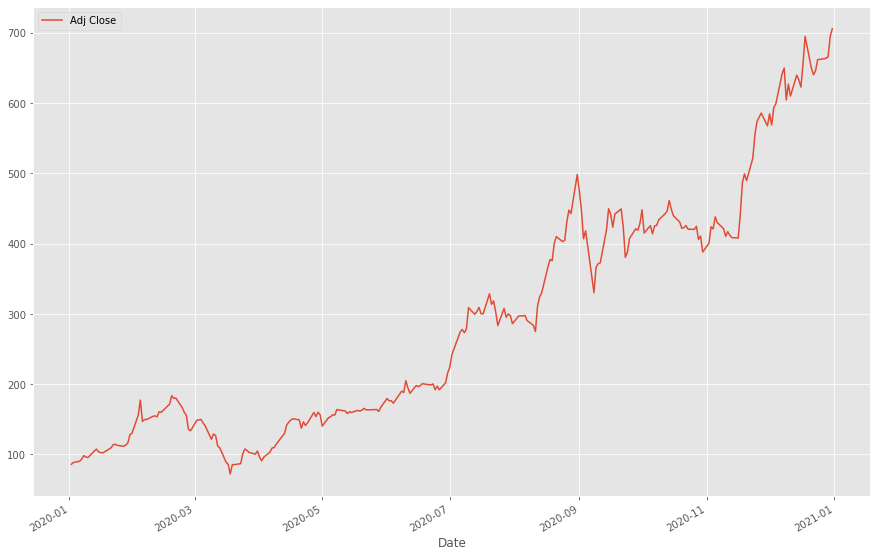

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

import matplotlib as mpl
mpl.rc('figure', figsize=(15, 10))
mpl.__version__

style.use('ggplot')

df.plot(label='adj_close')
plt.legend()


In [84]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='Adj Close', length=10, append=True)

# Inspect data
print(df)



             Adj Close      EMA_10
Date                              
2020-01-02   86.052002         NaN
2020-01-03   88.601997         NaN
2020-01-06   90.307999         NaN
2020-01-07   93.811996         NaN
2020-01-08   98.428001         NaN
...                ...         ...
2020-12-24  661.770020  643.572394
2020-12-28  663.690002  647.230141
2020-12-29  665.989990  650.641022
2020-12-30  694.780029  658.666296
2020-12-31  705.669983  667.212421

[253 rows x 2 columns]


In [85]:
# Print Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  253 non-null    float64
 1   EMA_10     244 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
None


In [86]:
# Print the first 10 entries of our data
print(df.head(10))


             Adj Close     EMA_10
Date                             
2020-01-02   86.052002        NaN
2020-01-03   88.601997        NaN
2020-01-06   90.307999        NaN
2020-01-07   93.811996        NaN
2020-01-08   98.428001        NaN
2020-01-09   96.267998        NaN
2020-01-10   95.629997        NaN
2020-01-13  104.972000        NaN
2020-01-14  107.584000        NaN
2020-01-15  103.699997  96.535599


In [87]:
# Drop the first n-rows
df = df.iloc[10:]

# View our newly-formed dataset
print(df.head(10))


             Adj Close      EMA_10
Date                              
2020-01-16  102.697998   97.656035
2020-01-17  102.099998   98.464028
2020-01-21  109.440002  100.459660
2020-01-22  113.912003  102.905540
2020-01-23  114.440002  105.002715
2020-01-24  112.963997  106.450221
2020-01-27  111.603996  107.387271
2020-01-28  113.379997  108.476858
2020-01-29  116.197998  109.880701
2020-01-30  128.162003  113.204574


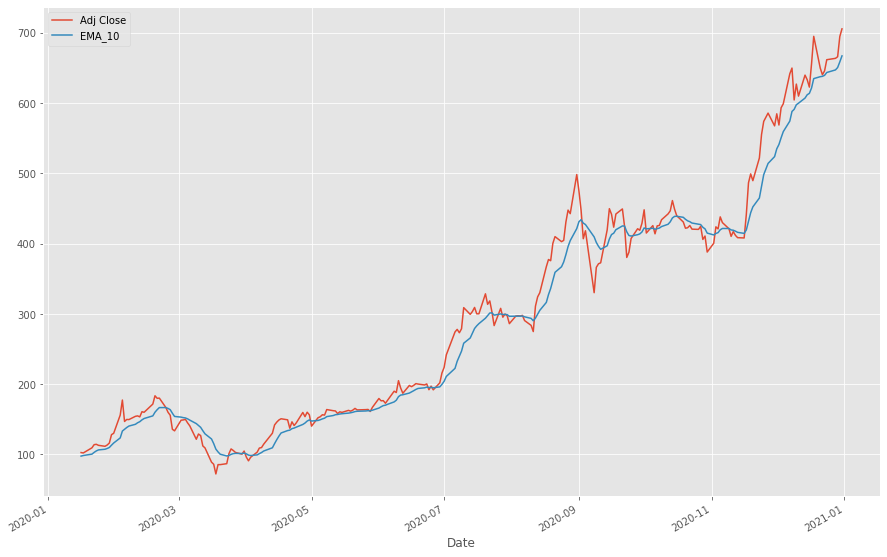

In [88]:
# Plot of our data

mpl.rc('figure', figsize=(15, 10))
mpl.__version__

style.use('ggplot')

df.plot(label='adj_close')
plt.legend()

In [89]:
from sklearn.model_selection import train_test_split

# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size = 0.2)

# Test set
print(X_test.describe())


        Adj Close
count   49.000000
mean   315.489675
std    190.698750
min     96.001999
25%    153.824005
50%    277.971985
75%    429.010010
max    695.000000


In [90]:
print(X_train.describe())

        Adj Close
count  194.000000
mean   293.530453
std    161.637065
min     72.244003
25%    155.819996
50%    281.127991
75%    420.114998
max    705.669983


In [91]:
print(y_test.describe())

           EMA_10
count   49.000000
mean   301.556994
std    179.859695
min     97.656035
25%    145.080741
50%    290.240024
75%    422.358320
max    658.666296


In [92]:
print(y_train.describe())

           EMA_10
count  194.000000
mean   283.812183
std    154.552118
min     97.856738
25%    150.639390
50%    252.662335
75%    418.740116
max    667.212421


In [93]:
from sklearn.linear_model import LinearRegression

# Create Regression Model
linreg = LinearRegression()

# Train the model
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

# Printout relevant metrics
print("Model Coefficients:", linreg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[0.94795365]]
Mean Absolute Error: 13.859657167075586
Coefficient of Determination: 0.989906799217066
